<a href="https://colab.research.google.com/github/basilsaju383/ML_project1/blob/main/RSSI_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('/content/sample_data/mc-1N GSM values 1 month.xlsx', header=None)
df.head()
df.dropna()
df[:5]

,0,1,2,3,4,5,6,7,8,9,10
0,Day,Date,Time,Device Name,Location,GPS Location,Aggregation,RSRP,RSRQ,RSSI,SNR
1,Mon,01/22/2024,11:07 am,MC-1N,Mt Chalmers,"-23.3318797,150.652168",AVG,NaN,NaN,NaN,NaN
2,Mon,01/22/2024,11:08 am,MC-1N,Mt Chalmers,"-23.3318797,150.652168",AVG,NaN,NaN,NaN,NaN
3,Mon,01/22/2024,11:09 am,MC-1N,Mt Chalmers,"-23.3318797,150.652168",AVG,NaN,NaN,NaN,NaN
4,Mon,01/22/2024,11:10 am,MC-1N,Mt Chalmers,"-23.3318797,150.652168",AVG,NaN,NaN,NaN,NaN


In [5]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [6]:
df_new = df[9]
df_new = df_new.dropna(axis=0)
df_new

0             RSSI
278            -68
293            -66
309            -69
324            -66
           ...    
41373          -65
41388          -66
41403          -69
41419          -68
43202   -68.368594
Name: 9, Length: 1524, dtype: object

In [10]:
df_new = pd.to_numeric(df_new, errors='coerce')
std = np.std(df_new)
mean = np.mean(df_new)
std
mean

-68.36859395532194

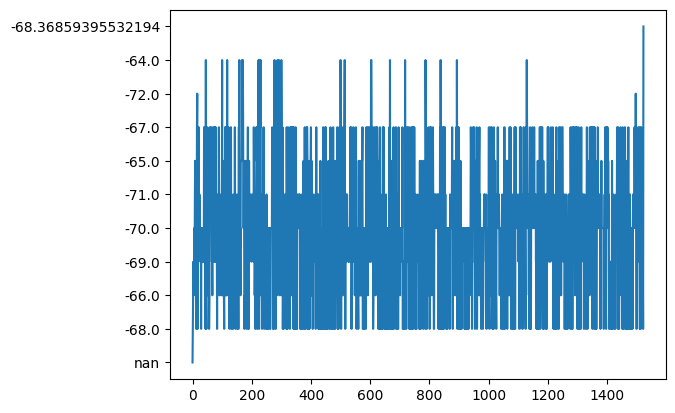

In [14]:
data_array = df_new.values.flatten().astype(str)
plt.plot(data_array)
plt.show()

In [15]:

# Identify and extract outliers
outliers_upper = df_new[df_new > mean + 4 * std]
outliers_lower = df_new[df_new < mean - 4 * std]

# Display outliers
print("Upper outliers:")
print(outliers_upper)

print("\nLower outliers:")
print(outliers_lower)


Upper outliers:
Series([], Name: 9, dtype: float64)

Lower outliers:
Series([], Name: 9, dtype: float64)


In [16]:
data1 = sorted(df_new)
q1 = np.percentile(data1, 25)
q3 = np.percentile(data1, 75)
IQR = q3-q1
lower = q1-(1.5*IQR)
upper = q3 + (1.5*IQR)

In [18]:
outliers = [i for i in data1 if i > upper or i < lower]
outliers

[]

In [19]:
thres = 2.5
mean = np.mean(df_new)
std = np.std(df_new)
outliers = [i for i in df_new if (i-mean)/std > thres]
outliers

[]

In [20]:
fifth_perc = np.percentile(df_new, 5)
nintyfifth_perc = np.percentile(df_new, 95)
outliers = [i for i in data1 if i > nintyfifth_perc or i < fifth_perc]
outliers

[]

In [28]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Read the Excel sheet
file_path = '/content/sample_data/mc-1N GSM values 1 month.xlsx'
df = pd.read_excel(file_path)
df_new = df["RSSI"]
df_new

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
43197          NaN
43198          NaN
43199          NaN
43200          NaN
43201   -68.368594
Name: RSSI, Length: 43202, dtype: float64

In [29]:
df_new = df_new.dropna(axis=0)

# Preprocess the data (assuming RSSI values are in a column named 'rssi')
rssi_data = df_new.values.reshape(-1, 1)

In [31]:
# Apply Local Outlier Factor (LOF)
clf_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # Set contamination manually
y_pred_lof = clf_lof.fit_predict(rssi_data)

# Add the anomaly labels to the original DataFrame
df_new['LOF_anomaly'] = y_pred_lof


ValueError: could not convert string to float: 'LOF_anomaly'

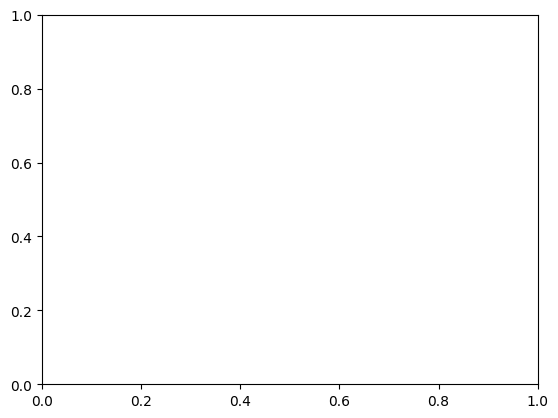

In [40]:
plt.scatter(df_new.index, df_new.values)
plt.title('LOF Anomaly Detection')
plt.xlabel('Index')
plt.ylabel('RSSI Values')
plt.show()

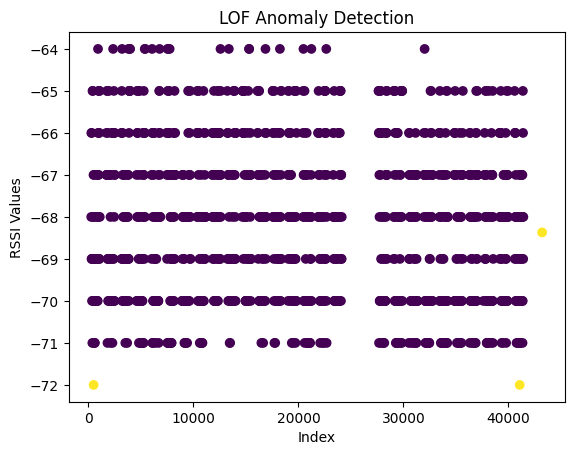

In [41]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Read the Excel sheet
file_path = '/content/sample_data/mc-1N GSM values 1 month.xlsx'
df = pd.read_excel(file_path)

# Assuming '9' is the column name you want to analyze
column_name = 'RSSI'

# Drop NaN values from the RSSI column
df_new = df[column_name].dropna()

# Preprocess the data
rssi_data = df_new.values.reshape(-1, 1)

# Apply Local Outlier Factor (LOF)
clf_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # Set contamination manually
y_pred_lof = clf_lof.fit_predict(rssi_data)

# Plot the results using LOF scores for coloring
plt.scatter(df_new.index, df_new.values, c=-y_pred_lof, cmap='viridis')  # Negate the scores for proper coloring
plt.title('LOF Anomaly Detection')
plt.xlabel('Index')
plt.ylabel('RSSI Values')
plt.show()
